Import packages

In [22]:
import env_methods as em
import vis_methods as vis
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import math
import time

Basic parameters

In [3]:
#Define bounding box in North America
lat_start = 0
lat_end = 90
lon_start = -179
lon_end =  -30

#Data paths
main_path = r'C:\Users\bpara\Geo data'

temps_path = r'\temp'
mean_path = r'\geopotential mean'
wind_path = r'\wind'

#Time stuff
month_to_show = 5 #What number of month to show, 0 = Dec 1843, 1 = Jan 1844, 2 = Feb 1844...

Import data

In [8]:
temp_data = em.get_data(main_path+temps_path, False, [12, 1843, 12, 1844])
mean_data = em.get_data(main_path+mean_path, False, [12, 1843, 12, 1844])
wind_data = em.get_data(main_path+wind_path, False, [12, 1843, 12, 1844])

acquring data from air.2m.mon.mean.nc
acquring data from hgt.mon.mean.nc
acquring data from uwnd.mon.mean.nc
acquring data from vwnd.mon.mean.nc


Draw the mapping

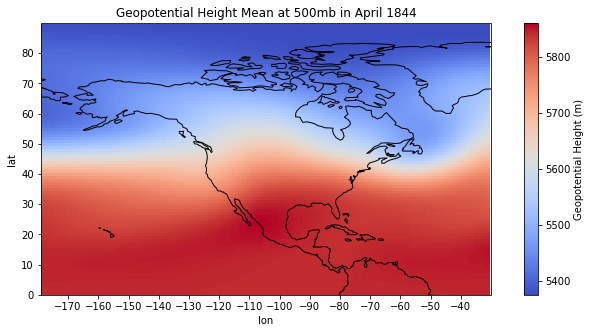

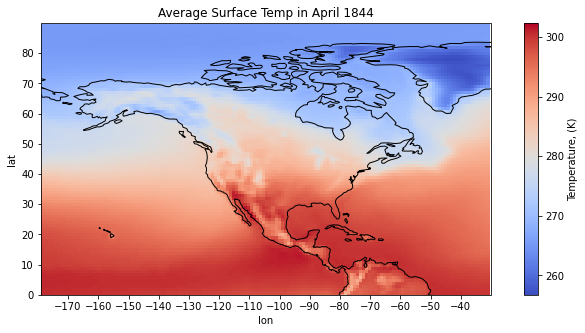

In [14]:
def plot_data(lon, lat, data, scalebar, title, lon_min = 0, lon_max = 359, lat_min = -90, lat_max = 90): 
    fig = plt.figure(figsize = (12, 5))
    ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = 0))
    ax.coastlines()
    
    lat1 = em.find_closest_val(lat_min, lat)
    lat2 = em.find_closest_val(lat_max, lat)
    
    ax.set_extent((lon_min, lon_max, lat_min, lat_max))
    ax.set_xticks(lon[math.ceil(lon_min / 10) * 10:lon_max][::10], crs = ccrs.PlateCarree())
    ax.set_yticks(lat[math.ceil(lat1 / 10) * 10:lat2][::10], crs = ccrs.PlateCarree())
    plt.xlabel('lon')
    plt.ylabel('lat')
    plt.title(title)
    
    mesh = plt.pcolormesh(lon[lon_min:lon_max], 
                          lat[lat1:lat2], 
                          data[lat1:lat2, lon_min:lon_max], 
                          cmap="coolwarm")
    cbar = plt.colorbar(mesh)
    cbar.set_label(scalebar)

plot_data(mean_data["lon"], mean_data["lat"], mean_data["nc_vars"]["hgt"][month_to_show][2], 
          "Geopotential Height (m)", "Geopotential Height Mean at 500mb in April 1844", lon_start, lon_end, lat_start, lat_end)
plot_data(temp_data["lon"], temp_data["lat"], temp_data["nc_vars"]["air"][month_to_show], "Temperature, (K)", 
          "Average Surface Temp in April 1844", lon_start, lon_end, lat_start, lat_end)

And now for vector wind

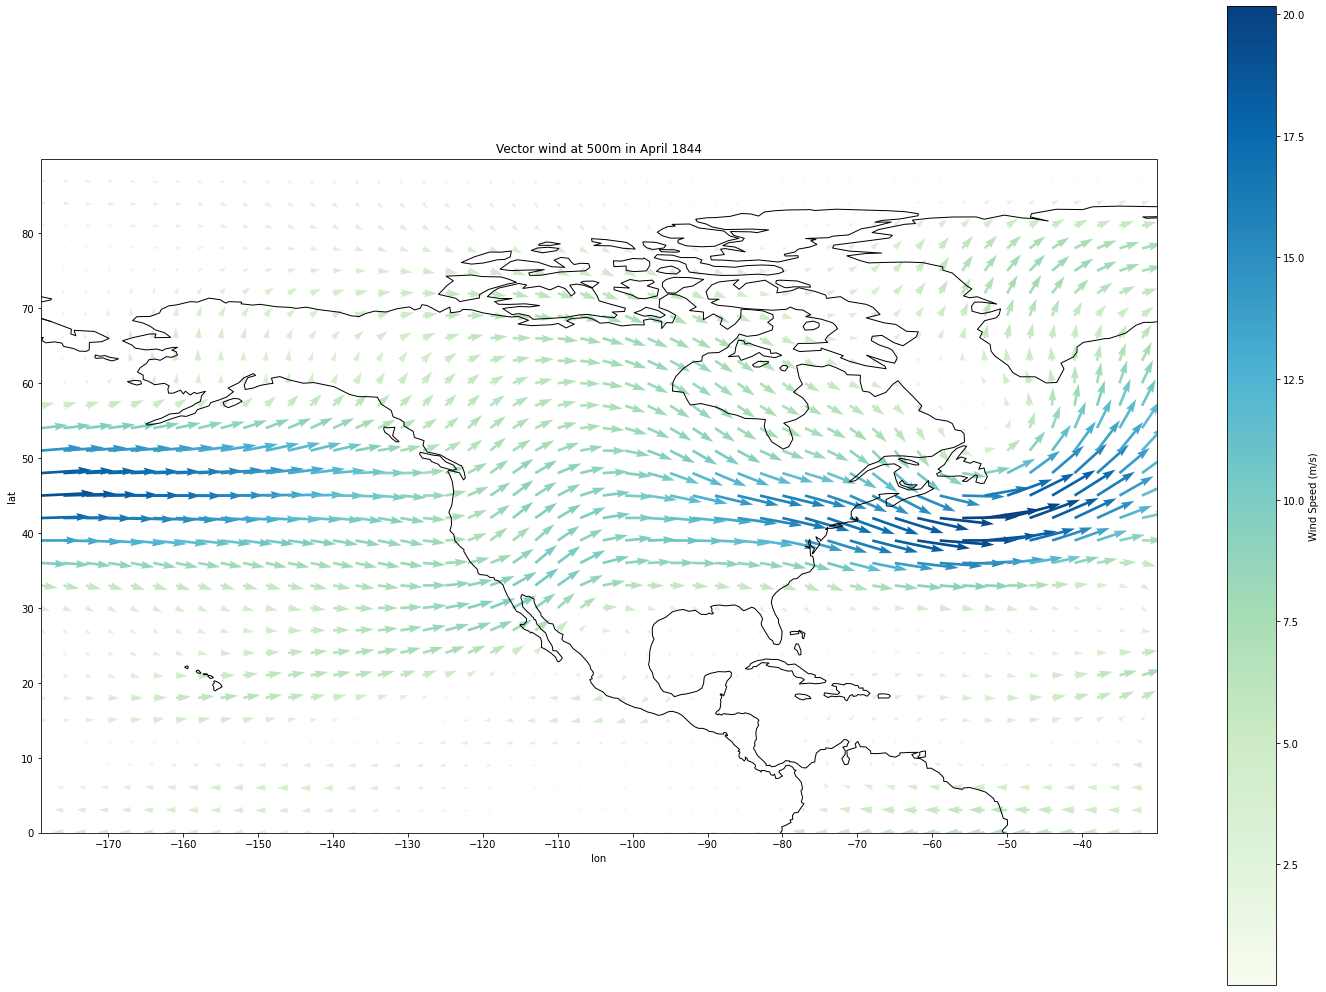

In [94]:
def plot_vector_data(lon, lat, x_data, y_data, title, scale_title, 
                     lon_min = 0, lon_max = 359, lat_min = -90, lat_max = 90, detail=3, v_scale = 400):
    fig = plt.figure(figsize = (25, 18))
    ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = 0))
    ax.coastlines()
    
    lat1 = em.find_closest_val(lat_min, lat)
    lat2 = em.find_closest_val(lat_max, lat)
    
    ax.set_extent((lon_min, lon_max, lat_min, lat_max))
    ax.set_xticks(lon[math.ceil(lon_min / 10) * 10:lon_max][::10], crs = ccrs.PlateCarree())
    ax.set_yticks(lat[math.ceil(lat1 / 10) * 10:lat2][::10], crs = ccrs.PlateCarree())
    plt.xlabel('lon')
    plt.ylabel('lat')
    plt.title(title)
    
    color = np.hypot(x_data[lat1:lat2, lon_min:lon_max][::detail, ::detail], 
                     y_data[lat1:lat2, lon_min:lon_max][::detail, ::detail])
    v_field = plt.quiver(lon[lon_min:lon_max][::detail], 
                          lat[lat1:lat2][::detail],
                        x_data[lat1:lat2, lon_min:lon_max][::detail, ::detail],
                        y_data[lat1:lat2, lon_min:lon_max][::detail, ::detail], color, cmap="GnBu", scale = v_scale)
    scalebar = plt.colorbar(v_field)
    scalebar.set_label(scale_title)
    
    
plot_vector_data(wind_data["lon"], wind_data["lat"], wind_data["nc_vars"]["uwnd"][month_to_show][2], 
                 wind_data["nc_vars"]["vwnd"][month_to_show][2], "Vector wind at 500m in April 1844", "Wind Speed (m/s)",
                 lon_start, lon_end, lat_start, lat_end)

Plain vector wind can get a little messy with really long arrows, this one normalizes the length of all the arrows and only uses the color for magnitude

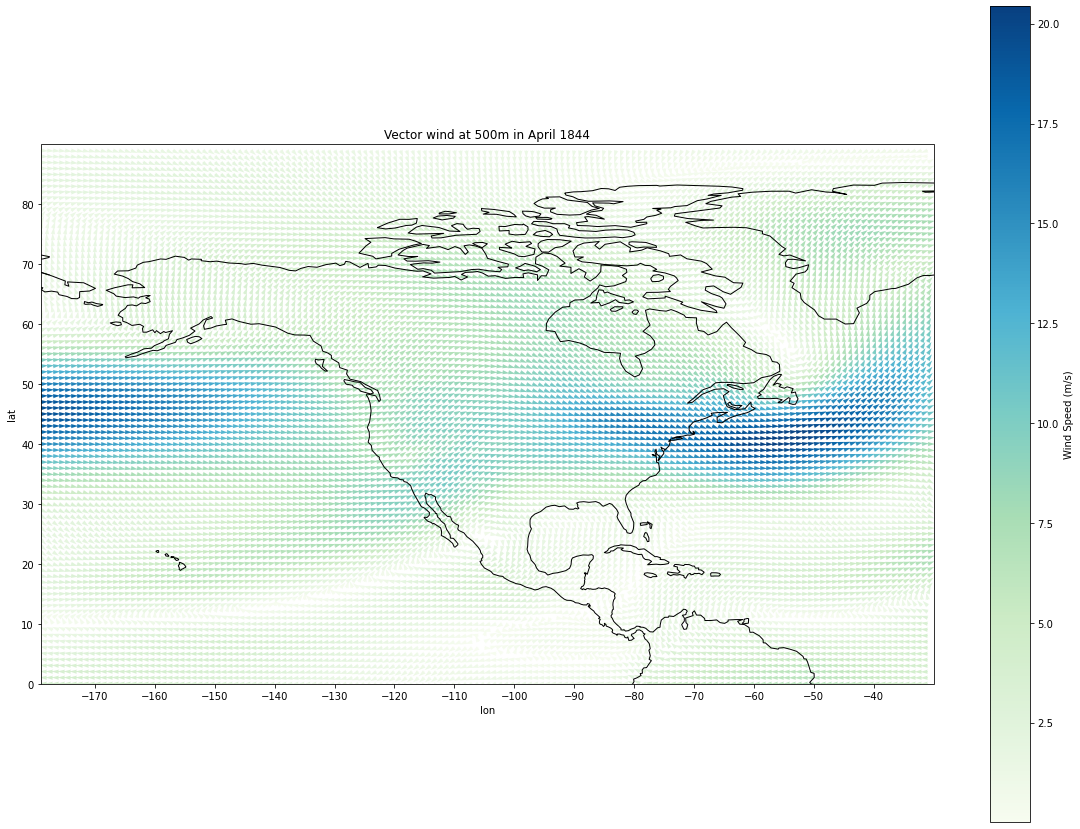

In [97]:
def plot_nvector_data(lon, lat, x_data, y_data, title, scale_title, 
                     lon_min = 0, lon_max = 359, lat_min = -90, lat_max = 90, detail=1):
    fig = plt.figure(figsize = (20, 15))
    ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = 0))
    ax.coastlines()
    
    lat1 = em.find_closest_val(lat_min, lat)
    lat2 = em.find_closest_val(lat_max, lat)
    
    ax.set_extent((lon_min, lon_max, lat_min, lat_max))
    ax.set_xticks(lon[math.ceil(lon_min / 10) * 10:lon_max][::10], crs = ccrs.PlateCarree())
    ax.set_yticks(lat[math.ceil(lat1 / 10) * 10:lat2][::10], crs = ccrs.PlateCarree())
    plt.xlabel('lon')
    plt.ylabel('lat')
    plt.title(title)
    
    color = np.hypot(x_data[lat1:lat2, lon_min:lon_max][::detail, ::detail], 
                     y_data[lat1:lat2, lon_min:lon_max][::detail, ::detail])
    v_field = plt.quiver(lon[lon_min:lon_max][::detail], 
                          lat[lat1:lat2][::detail],
                        np.divide(x_data[lat1:lat2, lon_min:lon_max][::detail, ::detail], color),
                        np.divide(y_data[lat1:lat2, lon_min:lon_max][::detail, ::detail], color), 
                         color, cmap="GnBu", scale = 125)
    scalebar = plt.colorbar(v_field)
    scalebar.set_label(scale_title)
    
    
plot_nvector_data(wind_data["lon"], wind_data["lat"], wind_data["nc_vars"]["uwnd"][month_to_show][2], 
                 wind_data["nc_vars"]["vwnd"][month_to_show][2], "Vector wind at 500m in April 1844", "Wind Speed (m/s)",
                 lon_start, lon_end, lat_start, lat_end)

In [76]:
wind_data

{'level': [1000, 850, 500],
 'lat': [-90.0,
  -89.0,
  -88.0,
  -87.0,
  -86.0,
  -85.0,
  -84.0,
  -83.0,
  -82.0,
  -81.0,
  -80.0,
  -79.0,
  -78.0,
  -77.0,
  -76.0,
  -75.0,
  -74.0,
  -73.0,
  -72.0,
  -71.0,
  -70.0,
  -69.0,
  -68.0,
  -67.0,
  -66.0,
  -65.0,
  -64.0,
  -63.0,
  -62.0,
  -61.0,
  -60.0,
  -59.0,
  -58.0,
  -57.0,
  -56.0,
  -55.0,
  -54.0,
  -53.0,
  -52.0,
  -51.0,
  -50.0,
  -49.0,
  -48.0,
  -47.0,
  -46.0,
  -45.0,
  -44.0,
  -43.0,
  -42.0,
  -41.0,
  -40.0,
  -39.0,
  -38.0,
  -37.0,
  -36.0,
  -35.0,
  -34.0,
  -33.0,
  -32.0,
  -31.0,
  -30.0,
  -29.0,
  -28.0,
  -27.0,
  -26.0,
  -25.0,
  -24.0,
  -23.0,
  -22.0,
  -21.0,
  -20.0,
  -19.0,
  -18.0,
  -17.0,
  -16.0,
  -15.0,
  -14.0,
  -13.0,
  -12.0,
  -11.0,
  -10.0,
  -9.0,
  -8.0,
  -7.0,
  -6.0,
  -5.0,
  -4.0,
  -3.0,
  -2.0,
  -1.0,
  0.0,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0,
  19.0,
  20.0,
  21.0